<a href="https://colab.research.google.com/github/lisafranchetti/JET/blob/main/detached.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving bristol_cleaned_detached1.csv to bristol_cleaned_detached1.csv


In [3]:
df = pd.read_csv('bristol_cleaned_detached1.csv')
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
0,420000.0,26/03/2015,BS31 2FB,DETACHED,CLAUDIUS ROAD,BRISTOL,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET,A,2015.0,MARCH,THURSDAY,0.446285,False,10500.0,False
1,395000.0,26/06/2015,BS35 2HY,DETACHED,MALVERN DRIVE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,2015.0,JUNE,FRIDAY,0.369977,False,9875.0,False
2,310000.0,07/08/2015,BS4 4QN,DETACHED,BIRCHWOOD ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,B,2015.0,AUGUST,FRIDAY,0.129745,False,7750.0,False
3,412500.0,11/08/2015,BS48 4NQ,DETACHED,ST MARYS GROVE,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.423735,False,10312.5,False
4,382500.0,11/08/2015,BS48 4RD,DETACHED,KINGSTON ROAD,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.333084,False,9562.5,False


In [4]:
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'], errors='coerce')

df['Year'] = df['Date of Transfer'].dt.year

/tmp/ipython-input-4-1022730211.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'], errors='coerce')


In [5]:
df.head()

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier
0,420000.0,2015-03-26,BS31 2FB,DETACHED,CLAUDIUS ROAD,BRISTOL,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET,A,2015.0,MARCH,THURSDAY,0.446285,False,10500.0,False
1,395000.0,2015-06-26,BS35 2HY,DETACHED,MALVERN DRIVE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,2015.0,JUNE,FRIDAY,0.369977,False,9875.0,False
2,310000.0,2015-08-07,BS4 4QN,DETACHED,BIRCHWOOD ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,B,2015.0,AUGUST,FRIDAY,0.129745,False,7750.0,False
3,412500.0,2015-08-11,BS48 4NQ,DETACHED,ST MARYS GROVE,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.423735,False,10312.5,False
4,382500.0,2015-08-11,BS48 4RD,DETACHED,KINGSTON ROAD,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.333084,False,9562.5,False


In [11]:

import re

def extract_postcode_area(postcode):
  match = re.match(r'^[A-Z]{1,2}\d{1,2}[A-Z]?', postcode.strip().upper())
  return match.group(0) if match else None

df['Postcode Area'] = df['Postcode'].astype(str).apply(extract_postcode_area)


In [12]:
df.head(5)

,Price,Date of Transfer,Postcode,Property Type,Street,Town/City,District,County,PPD Category Type,Year,Month,Day of Week,Percentile_Rank,Is_High_End,H4U_Commission,Is_Outlier,Postcode Area
0,420000.0,2015-03-26,BS31 2FB,DETACHED,CLAUDIUS ROAD,BRISTOL,BATH AND NORTH EAST SOMERSET,BATH AND NORTH EAST SOMERSET,A,2015.0,MARCH,THURSDAY,0.446285,False,10500.0,False,BS31
1,395000.0,2015-06-26,BS35 2HY,DETACHED,MALVERN DRIVE,BRISTOL,SOUTH GLOUCESTERSHIRE,SOUTH GLOUCESTERSHIRE,A,2015.0,JUNE,FRIDAY,0.369977,False,9875.0,False,BS35
2,310000.0,2015-08-07,BS4 4QN,DETACHED,BIRCHWOOD ROAD,BRISTOL,CITY OF BRISTOL,CITY OF BRISTOL,B,2015.0,AUGUST,FRIDAY,0.129745,False,7750.0,False,BS4
3,412500.0,2015-08-11,BS48 4NQ,DETACHED,ST MARYS GROVE,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.423735,False,10312.5,False,BS48
4,382500.0,2015-08-11,BS48 4RD,DETACHED,KINGSTON ROAD,BRISTOL,NORTH SOMERSET,NORTH SOMERSET,A,2015.0,AUGUST,TUESDAY,0.333084,False,9562.5,False,BS48


In [13]:
detached_df = df[['Price', 'Year', 'Postcode Area', 'Property Type']]
detached_df.head()

,Price,Year,Postcode Area,Property Type
0,420000.0,2015.0,BS31,DETACHED
1,395000.0,2015.0,BS35,DETACHED
2,310000.0,2015.0,BS4,DETACHED
3,412500.0,2015.0,BS48,DETACHED
4,382500.0,2015.0,BS48,DETACHED


In [62]:

# Define high-value postcodes
high_value_postcodes = ['BS1', 'BS2', 'BS3', 'BS4', 'BS5', 'BS6', 'BS7', 'BS11', 'BS12', 'BS13']


# Filter the DataFrame to include only rows with postcodes in the high-value list
filtered_df = detached_df[detached_df['Postcode Area'].isin(high_value_postcodes)]

# Group by year and calculate total sales count and total price
grouped = filtered_df.groupby('Year').agg(
    Sales_Count=('Price', 'count'),
    Total_Price=('Price', 'sum')
).reset_index()

# Sort by year
grouped = grouped.sort_values('Year').reset_index(drop=True)

# Display the result
print(grouped)


     Year  Sales_Count  Total_Price
0  2015.0          118   37886092.0
1  2016.0          118   43134351.0
2  2017.0          131   56039760.0
3  2018.0          126   51885306.0
4  2019.0          145   65320422.0
5  2020.0          104   49664755.0
6  2021.0          158   75011648.0
7  2022.0          130   66762671.0
8  2023.0          121   66256171.0
9  2024.0           90   49291941.0


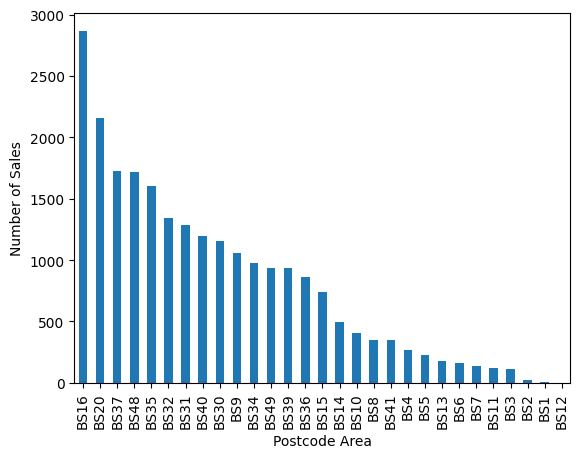

In [18]:
sales_volume.plot(kind='bar')
plt.title=('Sales Volume by Postcode Area')
plt.xlabel('Postcode Area')
plt.ylabel('Number of Sales')
plt.show()

TypeError: 'str' object is not callable

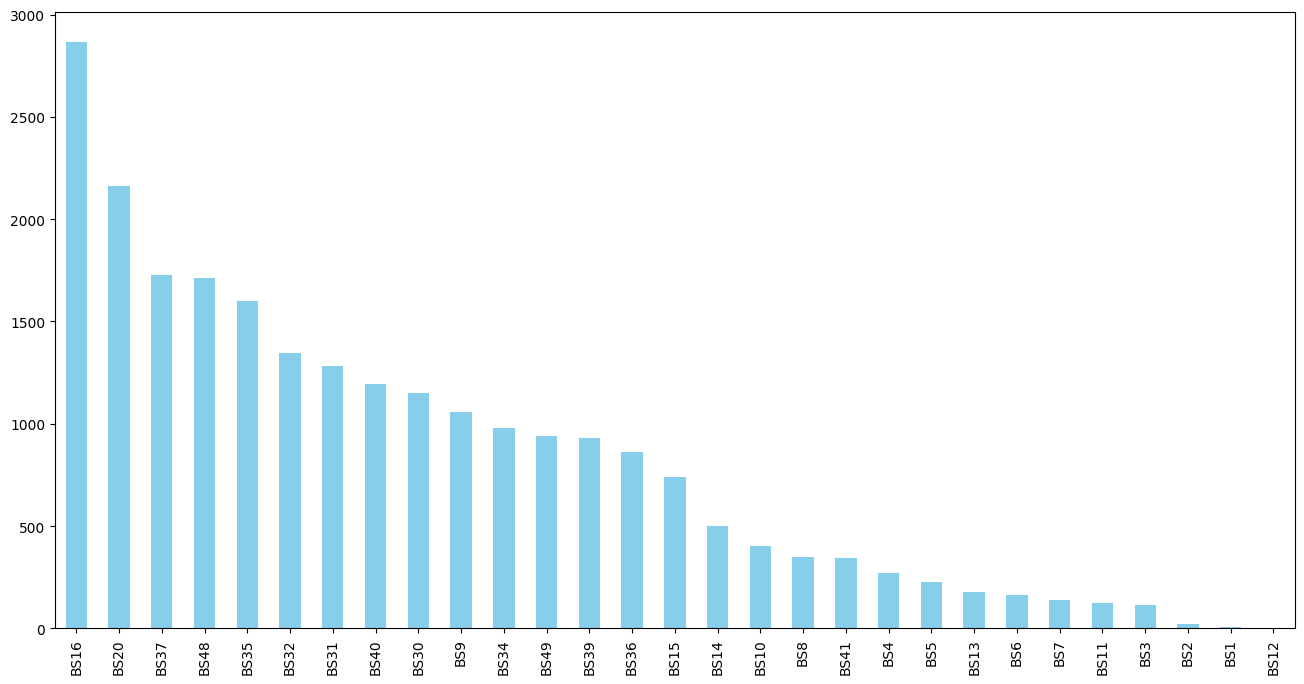

In [19]:

sales_volume = pd.Series({
    'BS16': 2867, 'BS20': 2161, 'BS37': 1725, 'BS48': 1714, 'BS35': 1602,
    'BS32': 1345, 'BS31': 1283, 'BS40': 1193, 'BS30': 1152, 'BS9': 1056,
    'BS34': 978, 'BS49': 938, 'BS39': 932, 'BS36': 860, 'BS15': 741,
    'BS14': 498, 'BS10': 402, 'BS8': 351, 'BS41': 345, 'BS4': 269,
    'BS5': 228, 'BS13': 176, 'BS6': 164, 'BS7': 137, 'BS11': 123,
    'BS3': 115, 'BS2': 22, 'BS1': 6
})


plt.figure(figsize=(16, 8))
ax = sales_volume.plot(kind='bar', color='skyblue')


plt.title('Sales Volume by Postcode Area')
plt.xlabel('Postcode Area')
plt.ylabel('Number of Sales')

# adding in exact number of sales for clarity
for i, value in enumerate(sales_volume):
    ax.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()



TypeError: 'str' object is not callable

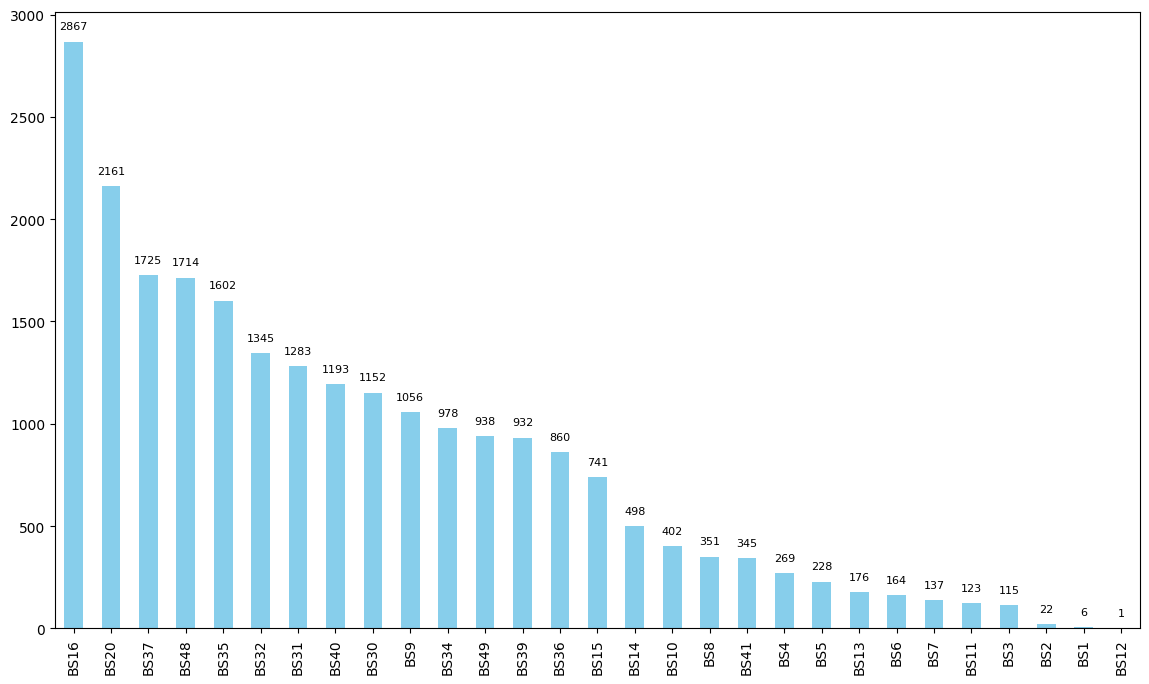

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.pyplot import title as plt_title

# Recreate the sales_volume Series from the user's data
sales_volume = pd.Series({
    'BS16': 2867, 'BS20': 2161, 'BS37': 1725, 'BS48': 1714, 'BS35': 1602,
    'BS32': 1345, 'BS31': 1283, 'BS40': 1193, 'BS30': 1152, 'BS9': 1056,
    'BS34': 978, 'BS49': 938, 'BS39': 932, 'BS36': 860, 'BS15': 741,
    'BS14': 498, 'BS10': 402, 'BS8': 351, 'BS41': 345, 'BS4': 269,
    'BS5': 228, 'BS13': 176, 'BS6': 164, 'BS7': 137, 'BS11': 123,
    'BS3': 115, 'BS2': 22, 'BS1': 6, 'BS12': 1
})

# Sort the series for better visualization
sales_volume = sales_volume.sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(14, 8))
ax = sales_volume.plot(kind='bar', color='skyblue')

# Add annotations on top of each bar
for i, value in enumerate(sales_volume):
    ax.text(i, value + 50, str(value), ha='center', va='bottom', fontsize=8)

# Set titles and labels
plt_title('Sales Volume by Postcode Area')
plt.xlabel('Postcode Area')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()



In [ ]:

import matplotlib.pyplot as plt

print(type(plt.title))


<class 'str'>


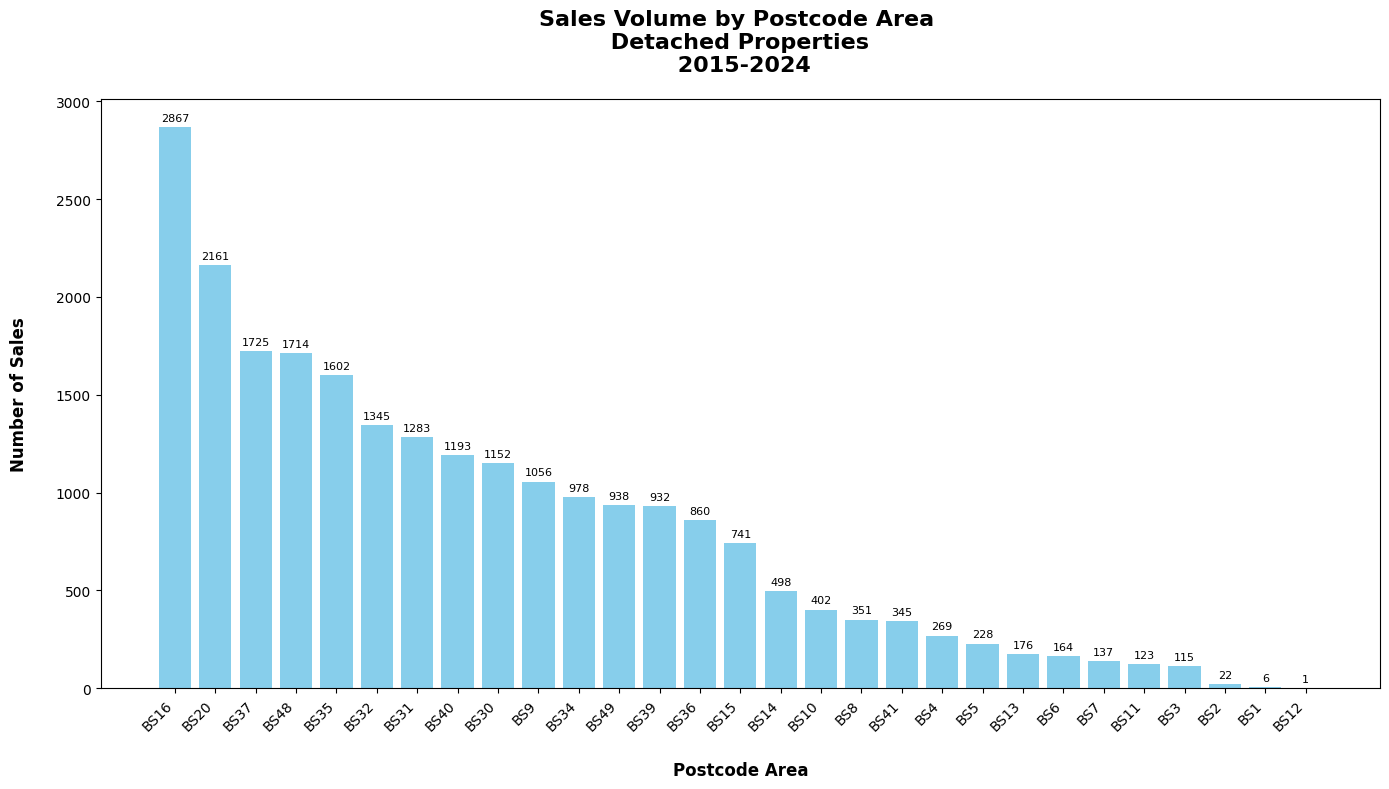

In [21]:
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(sales_volume.index, sales_volume.values, color='skyblue')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

# Set title and labels using ax methods
ax.set_title('Sales Volume by Postcode Area \n Detached Properties \n 2015-2024', fontweight='bold', fontsize=16, pad=20)
ax.set_xlabel('Postcode Area', fontweight='bold', fontsize=12, labelpad=20)
ax.set_ylabel('Number of Sales', fontweight='bold', fontsize=12, labelpad=20)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [22]:

# Group by postcode and calculate sales count and total price
summary = df.groupby('Postcode Area').agg(
  Sales_Count=('Price', 'count'),
  Total_Price=('Price', 'sum')
).reset_index()

# Display the result
print(summary)



   Postcode Area  Sales_Count   Total_Price
0            BS1            6  5.062000e+06
1           BS10          402  1.758194e+08
2           BS11          123  4.793916e+07
3           BS12            1  3.750000e+05
4           BS13          176  6.126838e+07
5           BS14          498  1.969232e+08
6           BS15          741  2.804453e+08
7           BS16         2867  1.293187e+09
8            BS2           22  1.500410e+07
9           BS20         2161  1.065116e+09
10           BS3          115  5.243998e+07
11          BS30         1152  5.198958e+08
12          BS31         1283  6.771907e+08
13          BS32         1345  6.084810e+08
14          BS34          978  3.868346e+08
15          BS35         1602  7.725167e+08
16          BS36          860  4.480023e+08
17          BS37         1725  7.525749e+08
18          BS39          932  4.249773e+08
19           BS4          269  1.021112e+08
20          BS40         1193  6.851659e+08
21          BS41          345  2

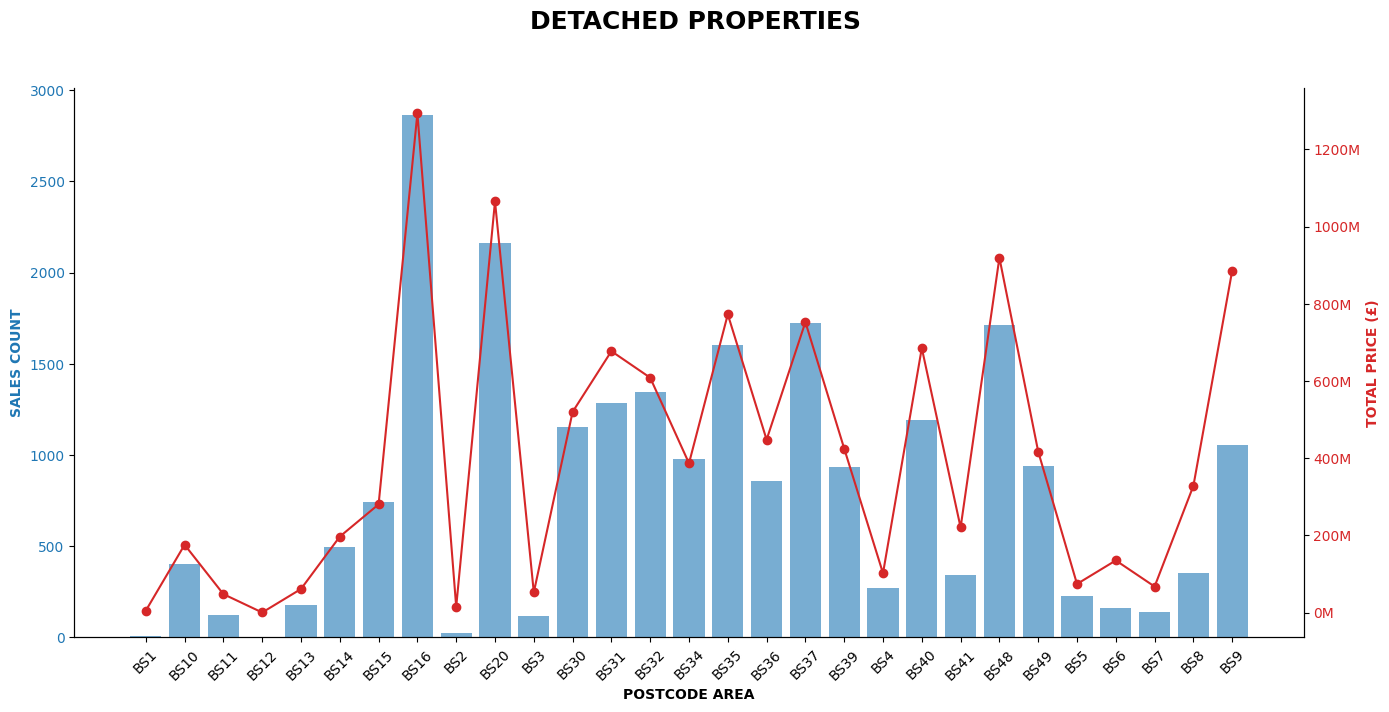

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Create the DataFrame from the provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [6, 402, 123, 1, 176, 498, 741, 2867, 22, 2161,
                    115, 1152, 1283, 1345, 978, 1602, 860, 1725, 932, 269,
                    1193, 345, 1714, 938, 228, 164, 137, 351, 1056],
    'Total_Price': [5.062e6, 1.758194e8, 4.793916e7, 3.75e5, 6.126838e7, 1.969232e8, 2.804453e8, 1.293187e9, 1.50041e7, 1.065116e9,
                    5.243998e7, 5.198958e8, 6.771907e8, 6.08481e8, 3.868346e8, 7.725167e8, 4.480023e8, 7.525749e8, 4.249773e8, 1.021112e8,
                    6.851659e8, 2.20563e8, 9.192052e8, 4.171213e8, 7.42213e7, 1.352201e8, 6.761191e7, 3.285027e8, 8.859263e8]
}

df = pd.DataFrame(data)

# Create a bar chart with dual axes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Sales Count
color = 'tab:blue'
ax1.set_xlabel('POSTCODE AREA', fontweight='bold')
ax1.set_ylabel('SALES COUNT', color=color, fontweight='bold')
ax1.bar(df['Postcode Area'], df['Sales_Count'], color=color, alpha=0.6, label='SALES COUNT')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for Total Price
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('TOTAL PRICE (£)', color=color, fontweight='bold')
ax2.plot(df['Postcode Area'], df['Total_Price'], color=color, marker='o', label='TOTAL PRICE')
ax2.tick_params(axis='y', labelcolor=color)

# Format the right-hand y-axis to show values in millions
formatter = FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M')
ax2.yaxis.set_major_formatter(formatter)

# Title and layout
fig.suptitle('DETACHED PROPERTIES', fontsize=18, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.setp(ax1.get_xticklabels(), rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)


# Remove background grid lines and top border
ax1.grid(False)
ax2.grid(False)
for spine in ['top']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)

# Show the plot
plt.show()






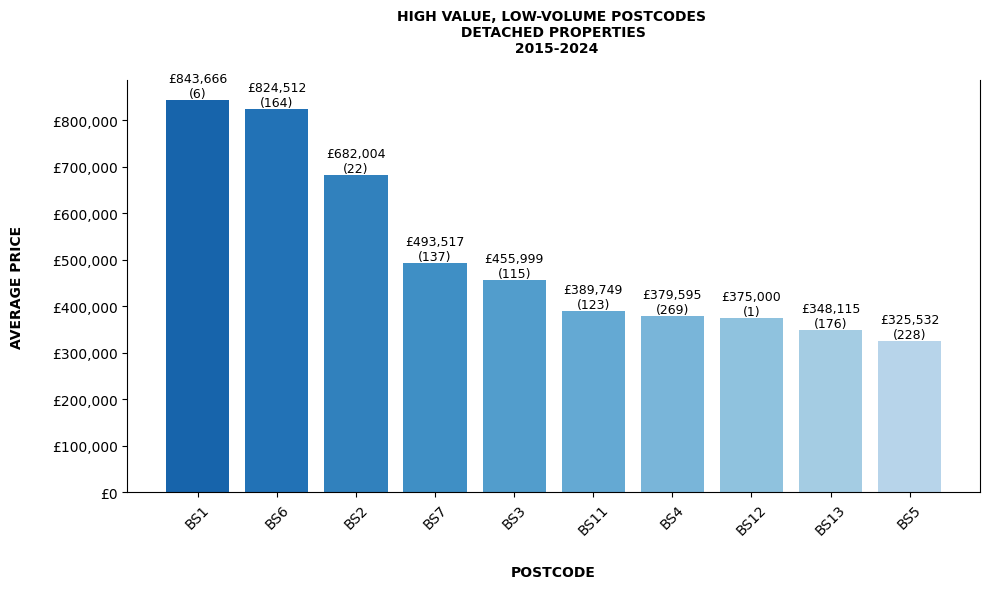

In [37]:

import matplotlib.ticker as ticker


data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [6, 402, 123, 1, 176, 498, 741, 2867, 22, 2161,
                    115, 1152, 1283, 1345, 978, 1602, 860, 1725, 932, 269,
                    1193, 345, 1714, 938, 228, 164, 137, 351, 1056],
    'Total_Price': [5.062e6, 1.758194e8, 4.793916e7, 3.75e5, 6.126838e7, 1.969232e8, 2.804453e8, 1.293187e9, 1.50041e7, 1.065116e9,
                    5.243998e7, 5.198958e8, 6.771907e8, 6.08481e8, 3.868346e8, 7.725167e8, 4.480023e8, 7.525749e8, 4.249773e8, 1.021112e8,
                    6.851659e8, 2.20563e8, 9.192052e8, 4.171213e8, 7.42213e7, 1.352201e8, 6.761191e7, 3.285027e8, 8.859263e8]
}

df = pd.DataFrame(data)

# average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# top 10 postcodes with lowest volume but highest average price
filtered_df = df.sort_values(by=['Sales_Count', 'Average_Price'], ascending=[True, False]).head(10)

# sort by descending average price
filtered_df = filtered_df.sort_values(by='Average_Price', ascending=False)

# blue gradient to coordinate with capgemini colours
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(filtered_df)))

# use Axes object with larger figure size so numbers don't cross the lines
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(filtered_df['Postcode Area'], filtered_df['Average_Price'], color=colors)


# list exact numbers on bars with pound sign
for bar, avg_price, count in zip(bars, filtered_df['Average_Price'], filtered_df['Sales_Count']):
 ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"£{int(avg_price):,}\n({count})",
  ha='center', va='bottom', fontsize=9)



ax.set_title('HIGH VALUE, LOW-VOLUME POSTCODES \n DETACHED PROPERTIES \n 2015-2024', fontsize=10, fontweight='bold', pad=20)
ax.set_ylabel('AVERAGE PRICE', fontweight='bold', labelpad=20, fontsize=10)
ax.set_xlabel('POSTCODE', fontweight='bold', labelpad=20)
ax.set_xticks(range(len(filtered_df)))
ax.set_xticklabels(filtered_df['Postcode Area'], rotation=45)

# thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'£{int(x):,}'))

# Remove background grid lines and top border

ax.grid(False)
ax.spines['top'].set_visible(False)


plt.tight_layout()

plt.show()




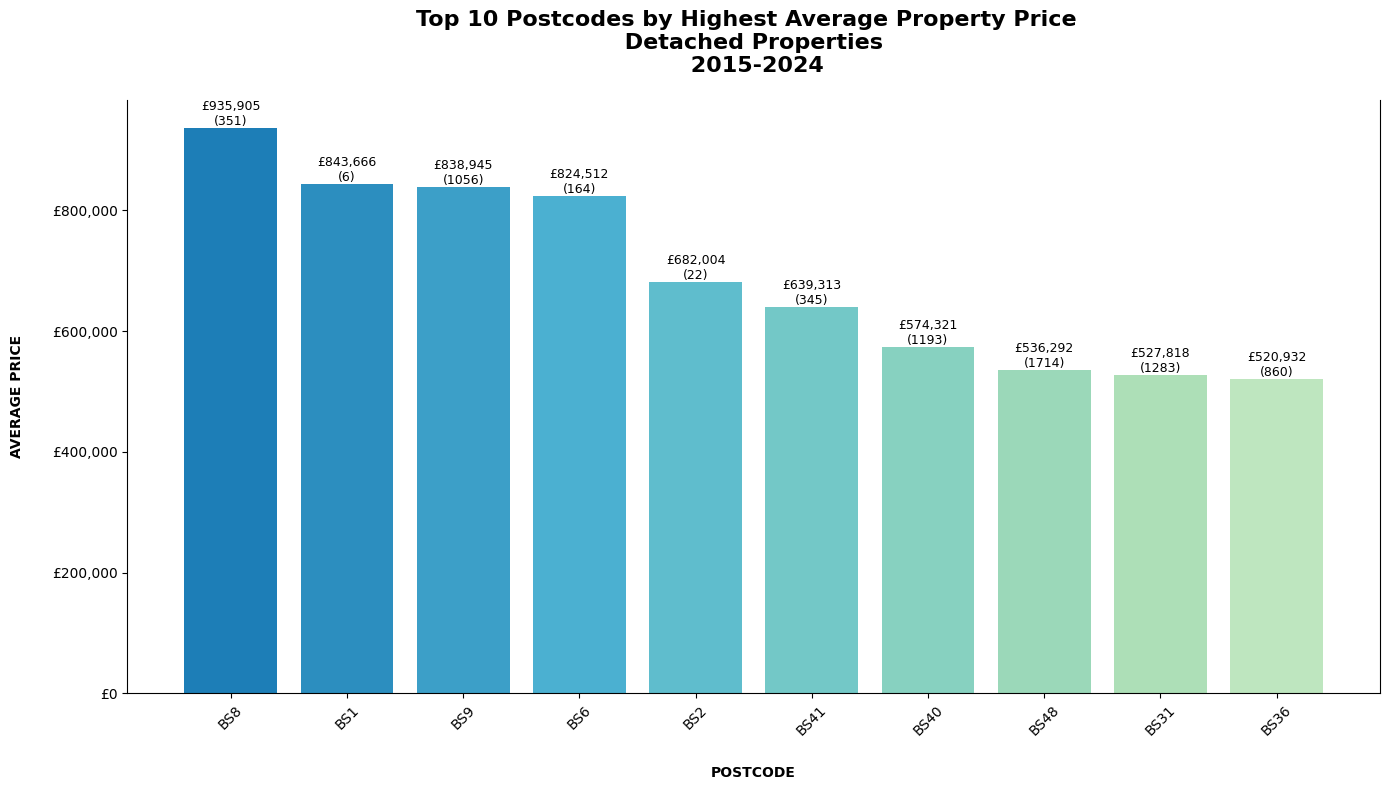

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

# Provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [6, 402, 123, 1, 176, 498, 741, 2867, 22, 2161,
                    115, 1152, 1283, 1345, 978, 1602, 860, 1725, 932, 269,
                    1193, 345, 1714, 938, 228, 164, 137, 351, 1056],
    'Total_Price': [5.062e6, 1.758194e8, 4.793916e7, 3.75e5, 6.126838e7, 1.969232e8, 2.804453e8, 1.293187e9, 1.50041e7, 1.065116e9,
                    5.243998e7, 5.198958e8, 6.771907e8, 6.08481e8, 3.868346e8, 7.725167e8, 4.480023e8, 7.525749e8, 4.249773e8, 1.021112e8,
                    6.851659e8, 2.20563e8, 9.192052e8, 4.171213e8, 7.42213e7, 1.352201e8, 6.761191e7, 3.285027e8, 8.859263e8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# Get top 10 postcodes by highest average price
top_avg_price_df = df.sort_values(by='Average_Price', ascending=False).head(10)

# Teal gradient colors
colors = plt.cm.GnBu(np.linspace(0.8, 0.3, len(top_avg_price_df)))

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_avg_price_df['Postcode Area'], top_avg_price_df['Average_Price'], color=colors)

# Annotate bars
for bar, avg_price, count in zip(bars, top_avg_price_df['Average_Price'], top_avg_price_df['Sales_Count']):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"£{int(avg_price):,}\n({count})",
            ha='center', va='bottom', fontsize=9)

# Titles and labels
ax.set_title('Top 10 Postcodes by Highest Average Property Price  \n Detached Properties \n 2015-2024', fontsize=16, fontweight='bold', pad=20)
ax.set_ylabel('AVERAGE PRICE', fontweight='bold', labelpad=20, fontsize=10)
ax.set_xlabel('POSTCODE', fontweight='bold', labelpad=20)
ax.set_xticks(range(len(top_avg_price_df)))
ax.set_xticklabels(top_avg_price_df['Postcode Area'], rotation=45)

# Format y-axis with thousands separator
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'£{int(x):,}'))

ax.grid(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()

plt.show()



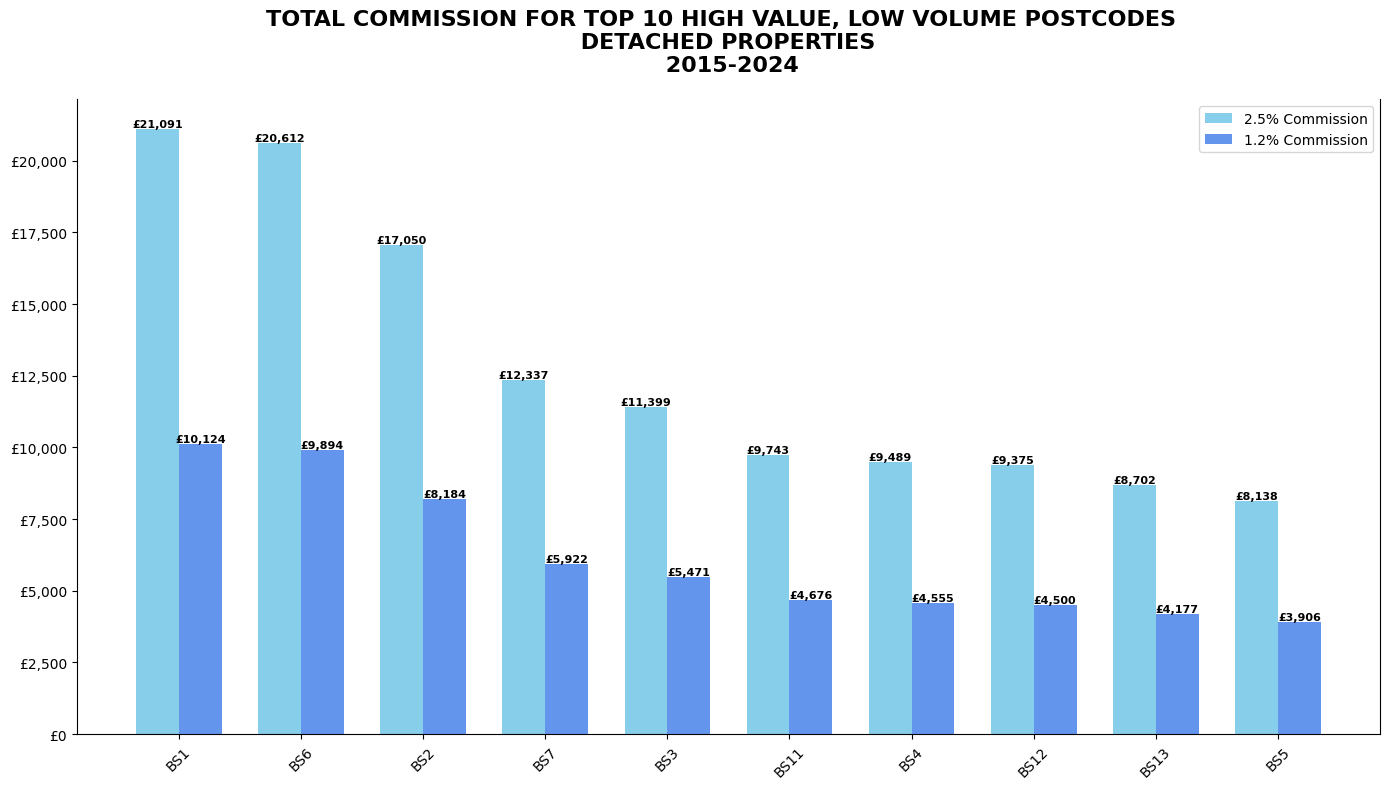

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Provided data
data = {
    'Postcode Area': ['BS1', 'BS10', 'BS11', 'BS12', 'BS13', 'BS14', 'BS15', 'BS16', 'BS2', 'BS20',
                      'BS3', 'BS30', 'BS31', 'BS32', 'BS34', 'BS35', 'BS36', 'BS37', 'BS39', 'BS4',
                      'BS40', 'BS41', 'BS48', 'BS49', 'BS5', 'BS6', 'BS7', 'BS8', 'BS9'],
    'Sales_Count': [6, 402, 123, 1, 176, 498, 741, 2867, 22, 2161,
                    115, 1152, 1283, 1345, 978, 1602, 860, 1725, 932, 269,
                    1193, 345, 1714, 938, 228, 164, 137, 351, 1056],
    'Total_Price': [5.062e6, 1.758194e8, 4.793916e7, 3.75e5, 6.126838e7, 1.969232e8, 2.804453e8, 1.293187e9, 1.50041e7, 1.065116e9,
                    5.243998e7, 5.198958e8, 6.771907e8, 6.08481e8, 3.868346e8, 7.725167e8, 4.480023e8, 7.525749e8, 4.249773e8, 1.021112e8,
                    6.851659e8, 2.20563e8, 9.192052e8, 4.171213e8, 7.42213e7, 1.352201e8, 6.761191e7, 3.285027e8, 8.859263e8]
}

# Create DataFrame
df = pd.DataFrame(data)

# Calculate average price
df['Average_Price'] = df['Total_Price'] / df['Sales_Count']

# Filter top 10 postcodes with lowest volume but highest average price
filtered_df = df.sort_values(by=['Sales_Count', 'Average_Price'], ascending=[True, False]).head(10)

# Sort by descending average price
filtered_df = filtered_df.sort_values(by='Average_Price', ascending=False)

# Calculate commissions
filtered_df['Commission_2.5%'] = filtered_df['Average_Price'] * 0.025
filtered_df['Commission_1.2%'] = filtered_df['Average_Price'] * 0.012

# Plotting
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.35
x = np.arange(len(filtered_df))

bars1 = ax.bar(x - bar_width/2, filtered_df['Commission_2.5%'], width=bar_width, label='2.5% Commission', color='skyblue')
bars2 = ax.bar(x + bar_width/2, filtered_df['Commission_1.2%'], width=bar_width, label='1.2% Commission', color='cornflowerblue')

# Annotate bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"£{int(height):,}", ha='center', va='bottom', fontweight='bold', fontsize=8)

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height, f"£{int(height):,}", ha='center', va='bottom', fontweight='bold', fontsize=8)

# Labels and formatting
ax.set_title('TOTAL COMMISSION FOR TOP 10 HIGH VALUE, LOW VOLUME POSTCODES  \n DETACHED PROPERTIES \n 2015-2024', fontsize=16, fontweight='bold', pad=20)
# ax.set_ylabel('TOTAL COMMISSION ON ALL SALES', fontweight='bold', labelpad=20)
# ax.set_xlabel('POSTCODE', fontweight='bold', labelpad=20)
ax.set_xticks(x)
ax.set_xticklabels(filtered_df['Postcode Area'], rotation=45)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'£{int(x):,}'))
ax.grid(False)
ax.spines['top'].set_visible(False)
plt.legend()
plt.tight_layout()

plt.show()



,Postcode Area,Sales_Count,Total_Price,Average_Price
0,BS1,6,5062000.0,843666.666667
1,BS10,402,175819400.0,437361.691542
2,BS11,123,47939160.0,389749.268293
3,BS12,1,375000.0,375000.000000
4,BS13,176,61268380.0,348115.795455
